In [1]:
!pip install tensorflow==2.0.0

ERROR: Could not find a version that satisfies the requirement tensorflow==2.0.0 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.19.0rc0)
ERROR: No matching distribution found for tensorflow==2.0.0


In [2]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [3]:
x = tf.constant([[5, 2], [1, 3]])
print(x)

tf.Tensor(
[[5 2]
 [1 3]], shape=(2, 2), dtype=int32)


In [4]:
x.numpy()

array([[5, 2],
       [1, 3]], dtype=int32)

In [5]:
print('dtype:', x.dtype)
print('shape:', x.shape)

dtype: <dtype: 'int32'>
shape: (2, 2)


In [6]:
print(tf.ones(shape=(2, 1)))
print(tf.zeros(shape=(2, 1)))

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [7]:
tf.random.normal(shape=(2, 2), mean=0., stddev=1.)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-1.8917756 ,  0.77622235],
       [-0.14037699,  0.31229275]], dtype=float32)>

In [8]:
tf.random.uniform(shape=(2, 2), minval=0, maxval=10, dtype='int32')

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[6, 0],
       [9, 1]], dtype=int32)>

In [9]:
initial_value = tf.random.normal(shape=(2, 2))
a = tf.Variable(initial_value)
print(a)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.05812505, -0.34070355],
       [ 0.6168207 , -0.31046748]], dtype=float32)>


In [10]:
new_value = tf.random.normal(shape=(2, 2))
a.assign(new_value)
for i in range(2):
  for j in range(2):
    assert a[i, j] == new_value[i, j]

In [11]:
added_value = tf.random.normal(shape=(2, 2))
a.assign_add(added_value)
for i in range(2):
  for j in range(2):
    assert a[i, j] == new_value[i, j] + added_value[i, j]

In [12]:
a = tf.random.normal(shape=(2, 2))
b = tf.random.normal(shape=(2, 2))

c = a + b
d = tf.square(c)
e = tf.exp(d)

In [13]:
a = tf.random.normal(shape=(2, 2))
b = tf.random.normal(shape=(2, 2))

with tf.GradientTape() as tape:
  tape.watch(a)  # Start recording the history of operations applied to `a`
  c = tf.sqrt(tf.square(a) + tf.square(b))  # Do some math using `a`
  # What's the gradient of `c` with respect to `a`?
  dc_da = tape.gradient(c, a)
  print(dc_da)

tf.Tensor(
[[ 0.7607395  -0.7184091 ]
 [ 0.27992845  0.48229736]], shape=(2, 2), dtype=float32)


In [14]:
a = tf.Variable(a)

with tf.GradientTape() as tape:
  c = tf.sqrt(tf.square(a) + tf.square(b))
  dc_da = tape.gradient(c, a)
  print(dc_da)

tf.Tensor(
[[ 0.7607395  -0.7184091 ]
 [ 0.27992845  0.48229736]], shape=(2, 2), dtype=float32)


In [15]:
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as tape:
    c = tf.sqrt(tf.square(a) + tf.square(b))
    dc_da = tape.gradient(c, a)
  d2c_da2 = outer_tape.gradient(dc_da, a)
  print(d2c_da2)

tf.Tensor(
[[1.1674031  0.40720388]
 [0.6101507  0.39390185]], shape=(2, 2), dtype=float32)


In [16]:
input_dim = 2
output_dim = 1
learning_rate = 0.01

# This is our weight matrix
w = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
# This is our bias vector
b = tf.Variable(tf.zeros(shape=(output_dim,)))

def compute_predictions(features):
  return tf.matmul(features, w) + b

def compute_loss(labels, predictions):
  return tf.reduce_mean(tf.square(labels - predictions))

def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    predictions = compute_predictions(x)
    loss = compute_loss(y, predictions)
    # Note that `tape.gradient` works with a list as well (w, b).
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

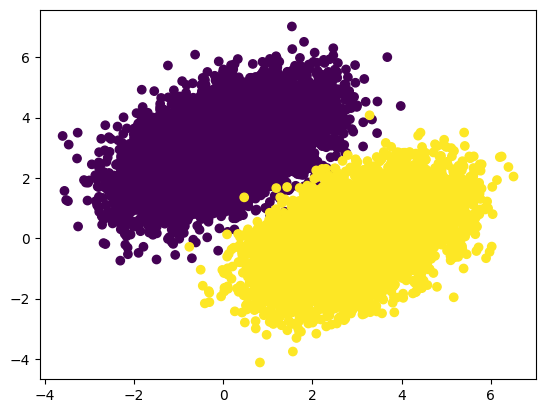

In [17]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Prepare a dataset.
num_samples = 10000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples)
features = np.vstack((negative_samples, positive_samples)).astype(np.float32)
labels = np.vstack((np.zeros((num_samples, 1), dtype='float32'),
                    np.ones((num_samples, 1), dtype='float32')))

plt.scatter(features[:, 0], features[:, 1], c=labels[:, 0])

In [18]:
# Shuffle the data.
indices = np.random.permutation(len(features))
features = features[indices]
labels = labels[indices]

# Create a tf.data.Dataset object for easy batched iteration
dataset = tf.data.Dataset.from_tensor_slices((features, labels))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

for epoch in range(10):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
  print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 0.0653
Epoch 1: last batch loss = 0.0773
Epoch 2: last batch loss = 0.0348
Epoch 3: last batch loss = 0.0329
Epoch 4: last batch loss = 0.0300
Epoch 5: last batch loss = 0.0266
Epoch 6: last batch loss = 0.0315
Epoch 7: last batch loss = 0.0201
Epoch 8: last batch loss = 0.0296
Epoch 9: last batch loss = 0.0208


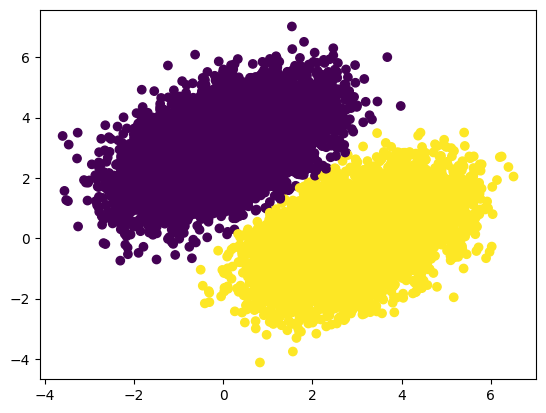

In [19]:
predictions = compute_predictions(features)
plt.scatter(features[:, 0], features[:, 1], c=predictions[:, 0] > 0.5)

In [20]:
import time

t0 = time.time()
for epoch in range(20):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
t_end = time.time() - t0
print('Time per epoch: %.3f s' % (t_end / 20,))

Time per epoch: 0.392 s


In [21]:
@tf.function
def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    predictions = compute_predictions(x)
    loss = compute_loss(y, predictions)
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

In [22]:
t0 = time.time()
for epoch in range(20):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
t_end = time.time() - t0
print('Time per epoch: %.3f s' % (t_end / 20,))

Time per epoch: 0.116 s


In [30]:
from tensorflow.keras.layers import Layer

class Linear(Layer):
  """y = w.x + b"""

  def __init__(self, units=32, input_dim=32):
      super(Linear, self).__init__()
      # Use self.add_weight to create and track weights
      self.w = self.add_weight(shape=(input_dim, units),
                               initializer='random_normal',
                               trainable=True)
      self.b = self.add_weight(shape=(units,),
                               initializer='zeros',
                               trainable=True)

  def call(self, inputs):
      return tf.matmul(inputs, self.w) + self.b

# Instantiate our layer.
linear_layer = Linear(4, 2)

In [31]:
y = linear_layer(tf.ones((2, 2)))
assert y.shape == (2, 4)

In [32]:
# Weights are automatically tracked under the `weights` property.
assert linear_layer.weights == [linear_layer.w, linear_layer.b]

In [36]:
w_init = tf.random_normal_initializer()
# Define the shape before using it
shape = (2, 2)  # Example shape, adjust as needed
w = tf.Variable(initial_value=w_init(shape=shape, dtype='float32')) # Remove 'self.' and replace with a simple variable name

In [37]:
class Linear(Layer):
  """y = w.x + b"""

  def __init__(self, units=32):
      super(Linear, self).__init__()
      self.units = units

  def build(self, input_shape):
      self.w = self.add_weight(shape=(input_shape[-1], self.units),
                               initializer='random_normal',
                               trainable=True)
      self.b = self.add_weight(shape=(self.units,),
                               initializer='random_normal',
                               trainable=True)

  def call(self, inputs):
      return tf.matmul(inputs, self.w) + self.b


# Instantiate our lazy layer.
linear_layer = Linear(4)

# This will also call `build(input_shape)` and create the weights.
y = linear_layer(tf.ones((2, 2)))
assert len(linear_layer.weights) == 2

In [39]:
from tensorflow.keras.layers import Layer

class ComputeSum(Layer):
  """Returns the sum of the inputs."""

  def __init__(self, input_dim):
      super(ComputeSum, self).__init__()
      # Create a non-trainable weight using add_weight.
      self.total = self.add_weight(
          name='total',
          shape=(input_dim,),
          initializer='zeros',
          trainable=False
      )

  def call(self, inputs):
      self.total.assign_add(tf.reduce_sum(inputs, axis=0))
      return self.total

my_sum = ComputeSum(2)
x = tf.ones((2, 2))

y = my_sum(x)
print(y.numpy())  # [2. 2.]

y = my_sum(x)
print(y.numpy())  # [4. 4.]

assert my_sum.weights == [my_sum.total]
assert my_sum.non_trainable_weights == [my_sum.total]
assert my_sum.trainable_weights == []

[2. 2.]
[4. 4.]


In [40]:
# Let's reuse the Linear class
# with a `build` method that we defined above.

class MLP(Layer):
    """Simple stack of Linear layers."""

    def __init__(self):
        super(MLP, self).__init__()
        self.linear_1 = Linear(32)
        self.linear_2 = Linear(32)
        self.linear_3 = Linear(10)

    def call(self, inputs):
        x = self.linear_1(inputs)
        x = tf.nn.relu(x)
        x = self.linear_2(x)
        x = tf.nn.relu(x)
        return self.linear_3(x)

mlp = MLP()

# The first call to the `mlp` object will create the weights.
y = mlp(tf.ones(shape=(3, 64)))

# Weights are recursively tracked.
assert len(mlp.weights) == 6

In [41]:
from tensorflow.keras.layers import Layer

class Dropout(Layer):

  def __init__(self, rate):
    super(Dropout, self).__init__()
    self.rate = rate

  def call(self, inputs, training=None):
    if training:
      return tf.nn.dropout(inputs, rate=self.rate)
    return inputs

class MLPWithDropout(Layer):

  def __init__(self):
      super(MLPWithDropout, self).__init__()
      self.linear_1 = Linear(32)
      self.dropout = Dropout(0.5)
      self.linear_3 = Linear(10)

  def call(self, inputs, training=None):
      x = self.linear_1(inputs)
      x = tf.nn.relu(x)
      x = self.dropout(x, training=training)
      return self.linear_3(x)

mlp = MLPWithDropout()
y_train = mlp(tf.ones((2, 2)), training=True)
y_test = mlp(tf.ones((2, 2)), training=False)

In [42]:
# We use an `Input` object to describe the shape and dtype of the inputs.
# This is the deep learning equivalent of *declaring a type*.
# The shape argument is per-sample; it does not include the batch size.
# The functional API focused on defining per-sample transformations.
# The model we create will automatically batch the per-sample transformations,
# so that it can be called on batches of data.
inputs = tf.keras.Input(shape=(16,))

# We call layers on these "type" objects
# and they return updated types (new shapes/dtypes).
x = Linear(32)(inputs) # We are reusing the Linear layer we defined earlier.
x = Dropout(0.5)(x) # We are reusing the Dropout layer we defined earlier.
outputs = Linear(10)(x)

# A functional `Model` can be defined by specifying inputs and outputs.
# A model is itself a layer like any other.
model = tf.keras.Model(inputs, outputs)

# A functional model already has weights, before being called on any data.
# That's because we defined its input shape in advance (in `Input`).
assert len(model.weights) == 4

# Let's call our model on some data.
y = model(tf.ones((2, 16)))
assert y.shape == (2, 10)

In [43]:
from tensorflow.keras import Sequential

model = Sequential([Linear(32), Dropout(0.5), Linear(10)])

y = model(tf.ones((2, 16)))
assert y.shape == (2, 10)

In [44]:
bce = tf.keras.losses.BinaryCrossentropy()
y_true = [0., 0., 1., 1.]  # Targets
y_pred = [1., 1., 1., 0.]  # Predictions
loss = bce(y_true, y_pred)
print('Loss:', loss.numpy())

Loss: 12.000716


In [45]:
m = tf.keras.metrics.AUC()
m.update_state([0, 1, 1, 1], [0, 1, 0, 0])
print('Intermediate result:', m.result().numpy())

m.update_state([1, 1, 1, 1], [0, 1, 1, 0])
print('Final result:', m.result().numpy())

Intermediate result: 0.6666667
Final result: 0.71428573


In [46]:
class BinaryTruePositives(tf.keras.metrics.Metric):

  def __init__(self, name='binary_true_positives', **kwargs):
    super(BinaryTruePositives, self).__init__(name=name, **kwargs)
    self.true_positives = self.add_weight(name='tp', initializer='zeros')

  def update_state(self, y_true, y_pred, sample_weight=None):
    y_true = tf.cast(y_true, tf.bool)
    y_pred = tf.cast(y_pred, tf.bool)

    values = tf.logical_and(tf.equal(y_true, True), tf.equal(y_pred, True))
    values = tf.cast(values, self.dtype)
    if sample_weight is not None:
      sample_weight = tf.cast(sample_weight, self.dtype)
      values = tf.multiply(values, sample_weight)
    self.true_positives.assign_add(tf.reduce_sum(values))

  def result(self):
    return self.true_positives

  def reset_states(self):
    self.true_positive.assign(0)

m = BinaryTruePositives()
m.update_state([0, 1, 1, 1], [0, 1, 0, 0])
print('Intermediate result:', m.result().numpy())

m.update_state([1, 1, 1, 1], [0, 1, 1, 0])
print('Final result:', m.result().numpy())

Intermediate result: 1.0
Final result: 3.0


In [47]:
from tensorflow.keras import layers

# Prepare a dataset.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train[:].reshape(60000, 784).astype('float32') / 255
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset = dataset.shuffle(buffer_size=1024).batch(64)

# Instantiate a simple classification model
model = tf.keras.Sequential([
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(10)
])

# Instantiate a logistic loss function that expects integer targets.
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam()

# Iterate over the batches of the dataset.
for step, (x, y) in enumerate(dataset):
  # Open a GradientTape.
  with tf.GradientTape() as tape:

    # Forward pass.
    logits = model(x)

    # Loss value for this batch.
    loss_value = loss(y, logits)

  # Get gradients of loss wrt the weights.
  gradients = tape.gradient(loss_value, model.trainable_weights)

  # Update the weights of our linear layer.
  optimizer.apply_gradients(zip(gradients, model.trainable_weights))

  # Update the running accuracy.
  accuracy.update_state(y, logits)

  # Logging.
  if step % 100 == 0:
    print('Step:', step)
    print('Loss from last step: %.3f' % loss_value)
    print('Total running accuracy so far: %.3f' % accuracy.result())

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Step: 0
Loss from last step: 2.253
Total running accuracy so far: 0.094
Step: 100
Loss from last step: 0.273
Total running accuracy so far: 0.845
Step: 200
Loss from last step: 0.183
Total running accuracy so far: 0.878
Step: 300
Loss from last step: 0.198
Total running accuracy so far: 0.896
Step: 400
Loss from last step: 0.232
Total running accuracy so far: 0.908
Step: 500
Loss from last step: 0.070
Total running accuracy so far: 0.916
Step: 600
Loss from last step: 0.105
Total running accuracy so far: 0.922
Step: 700
Loss from last step: 0.211
Total running accuracy so far: 0.927
Step: 800
Loss from last step: 0.243
Total running accuracy so far: 0.931
Step: 900
Loss from last step: 0.032
Total running accuracy so far: 0.935


In [50]:
x_test = x_test[:].reshape(10000, 784).astype('float32') / 255
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(128)

# Instead of calling reset_states(), re-initialize the accuracy object
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

for step, (x, y) in enumerate(test_dataset):
  logits = model(x)
  accuracy.update_state(y, logits)

print('Final test accuracy: %.3f' % accuracy.result())

Final test accuracy: 0.089


In [51]:
from tensorflow.keras.layers import Layer

class ActivityRegularization(Layer):
  """Layer that creates an activity sparsity regularization loss."""

  def __init__(self, rate=1e-2):
    super(ActivityRegularization, self).__init__()
    self.rate = rate

  def call(self, inputs):
    # We use `add_loss` to create a regularization loss
    # that depends on the inputs.
    self.add_loss(self.rate * tf.reduce_sum(tf.square(inputs)))
    return inputs

In [52]:
from tensorflow.keras import layers

class SparseMLP(Layer):
  """Stack of Linear layers with a sparsity regularization loss."""

  def __init__(self, output_dim):
      super(SparseMLP, self).__init__()
      self.dense_1 = layers.Dense(32, activation=tf.nn.relu)
      self.regularization = ActivityRegularization(1e-2)
      self.dense_2 = layers.Dense(output_dim)

  def call(self, inputs):
      x = self.dense_1(inputs)
      x = self.regularization(x)
      return self.dense_2(x)


mlp = SparseMLP(1)
y = mlp(tf.ones((10, 10)))

print(mlp.losses)  # List containing one float32 scalar

[<tf.Tensor: shape=(), dtype=float32, numpy=1.2248486280441284>]


In [53]:
# Losses correspond to the *last* forward pass.
mlp = SparseMLP(1)
mlp(tf.ones((10, 10)))
assert len(mlp.losses) == 1
mlp(tf.ones((10, 10)))
assert len(mlp.losses) == 1  # No accumulation.

# Let's demonstrate how to use these losses in a training loop.

# Prepare a dataset.
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
dataset = tf.data.Dataset.from_tensor_slices(
    (x_train.reshape(60000, 784).astype('float32') / 255, y_train))
dataset = dataset.shuffle(buffer_size=1024).batch(64)

# A new MLP.
mlp = SparseMLP(10)

# Loss and optimizer.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

for step, (x, y) in enumerate(dataset):
  with tf.GradientTape() as tape:
    # Forward pass.
    logits = mlp(x)

    # External loss value for this batch.
    loss = loss_fn(y, logits)

    # Add the losses created during the forward pass.
    loss += sum(mlp.losses)

    # Get gradients of loss wrt the weights.
    gradients = tape.gradient(loss, mlp.trainable_weights)

  # Update the weights of our linear layer.
  optimizer.apply_gradients(zip(gradients, mlp.trainable_weights))

  # Logging.
  if step % 100 == 0:
    print('Loss at step %d: %.3f' % (step, loss))

Loss at step 0: 4.452
Loss at step 100: 2.296
Loss at step 200: 2.266
Loss at step 300: 2.195
Loss at step 400: 2.092
Loss at step 500: 2.016
Loss at step 600: 1.875
Loss at step 700: 1.976
Loss at step 800: 1.794
Loss at step 900: 1.926


In [54]:
# Prepare a dataset.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset = dataset.shuffle(buffer_size=1024).batch(64)

# Instantiate a simple classification model
model = tf.keras.Sequential([
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(10)
])

# Instantiate a logistic loss function that expects integer targets.
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam()

In [55]:
model.compile(optimizer=optimizer, loss=loss, metrics=[accuracy])

In [56]:
model.fit(dataset, epochs=3)

Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.3907 - sparse_categorical_accuracy: 0.8870
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0932 - sparse_categorical_accuracy: 0.9716
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0612 - sparse_categorical_accuracy: 0.9814


In [57]:
x_test = x_test[:].reshape(10000, 784).astype('float32') / 255
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(128)

loss, acc = model.evaluate(test_dataset)
print('loss: %.3f - acc: %.3f' % (loss, acc))

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1002 - sparse_categorical_accuracy: 0.9685
loss: 0.085 - acc: 0.973


In [58]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255

num_val_samples = 10000
x_val = x_train[-num_val_samples:]
y_val = y_train[-num_val_samples:]
x_train = x_train[:-num_val_samples]
y_train = y_train[:-num_val_samples]

# Instantiate a simple classification model
model = tf.keras.Sequential([
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(10)
])

# Instantiate a logistic loss function that expects integer targets.
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer,
              loss=loss,
              metrics=[accuracy])
model.fit(x_train, y_train,
          validation_data=(x_val, y_val),
          epochs=3,
          batch_size=64)

Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.4343 - sparse_categorical_accuracy: 0.8704 - val_loss: 0.1257 - val_sparse_categorical_accuracy: 0.9626
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0937 - sparse_categorical_accuracy: 0.9715 - val_loss: 0.0855 - val_sparse_categorical_accuracy: 0.9750
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0597 - sparse_categorical_accuracy: 0.9817 - val_loss: 0.0894 - val_sparse_categorical_accuracy: 0.9731


In [59]:
# Instantiate a simple classification model
model = tf.keras.Sequential([
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(256, activation=tf.nn.relu),
  layers.Dense(10)
])

# Instantiate a logistic loss function that expects integer targets.
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer,
              loss=loss,
              metrics=[accuracy])

# Instantiate some callbacks
callbacks = [tf.keras.callbacks.EarlyStopping(),
             tf.keras.callbacks.ModelCheckpoint(filepath='my_model.keras',
                                                save_best_only=True)]

model.fit(x_train, y_train,
          validation_data=(x_val, y_val),
          epochs=30,
          batch_size=64,
          callbacks=callbacks)

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.4361 - sparse_categorical_accuracy: 0.8725 - val_loss: 0.1209 - val_sparse_categorical_accuracy: 0.9662
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.1013 - sparse_categorical_accuracy: 0.9696 - val_loss: 0.0872 - val_sparse_categorical_accuracy: 0.9739
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0628 - sparse_categorical_accuracy: 0.9807 - val_loss: 0.0873 - val_sparse_categorical_accuracy: 0.9751
